# Embedded ML - Lab 1.1: Native implementation of Artificial Neural Netwroks

In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn, PyTorch or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some code but you are expected to write some more and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



In [ ]:
# To run this notebook, locally as a jupyter notebook, you need to install the following packages:

#1. Create a virtual environment through conda or venv
#   For example, using conda:
#                conda create -n [myenv] python=3.8
#                conda activate [myenv]
#   Or using venv:
#                python3 -m venv [myenv]
#                source [myenv]/bin/activate
#
#
#2. Activate the virtual environment
#3. Install the required packages using pip
#4. Run the notebook


# Install the required packages
%pip install numpy -q
%pip install matplotlib -q


# It use tensorflow JUST to load the minist dataset
%pip install tensorflow -q


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1. Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Below is an incomplete code for a Python class that implements a linear regressor. You should **complete the missing code** for the predict() and error() methods and then write a simple implementation of the class.

In [ ]:
import random

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    """
    Predict the output for a given input using the linear model.
    Parameters:
    x (list): List of input values.
    Returns:
    list: List of predicted output values.
    """
    # Initialize an empty list to store predicted Y values
    self.myY = []

    # Iterate through each input value
    for xi in x:
      y_pred = self.w * xi + self.b       # Calculate the predicted Y value using the linear equation
      self.myY.append(y_pred)             # Append the predicted Y value to the list

    return self.myY
  
  def error(self, y):
    """
    Calculate the total error between the predicted and actual output values.
    Parameters:
    y (list): List of actual output values.
    Returns:
    float: Total error (sum of squared differences).
    """
    
    #inicialize the error variable
    total_error = 0

    # Iterate through the predicted and actual Y values
    for i in range(len(self.myY)):
      # Calculate the squared difference between predicted and actual Y values
      total_error += (self.myY[i] - y[i]) ** 2
    
    return total_error
  




datasets = {
    "A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    },
}

# 1. Assign values to globals w and b


w = 2  # From dataset A, we can see the slope is 2 (y increases by 2 when x increases by 1)
b = -1  # When x=0, y=-1 in dataset A

# This way we have a linear function y = 2x - 1


# 2. Instantiate the LinRegressor class
lin_reg = LinRegressor(w, b)


# 3. Perform a prediction using dataset A or B
x = datasets["A"]["input"]
y_pred = lin_reg.predict(x)

# 4. Measure the error
y_true = datasets["A"]["output"]
error = lin_reg.error(y_true)
print(f"Error for dataset A: {error}")


# Implementation with dataset B
x = datasets["B"]["input"]
y_pred = lin_reg.predict(x)
y_true = datasets["B"]["output"]
error = lin_reg.error(y_true)
print(f"Error for dataset B: {error}")





Error for dataset A: 0
Error for dataset B: 775.2207


Measure the error for three different sets of parameter values, for each dataset. **Plot the datasets against the predictions** and analyze the model results obtained.

*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?

Dataset to analize A:
Error for dataset A with w=2 and b=-1: 0
Error for dataset A with w=0.5 and b=1: 291.25
Error for dataset A with w=1 and b=1: 105


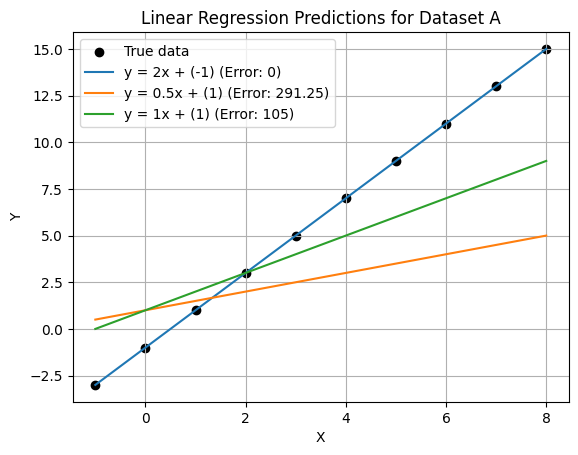

Dataset to analize B:
Error for dataset B with w=2 and b=-1: 775.2207
Error for dataset B with w=0.5 and b=1: 47.25369999999999
Error for dataset B with w=1 and b=1: 146.1727


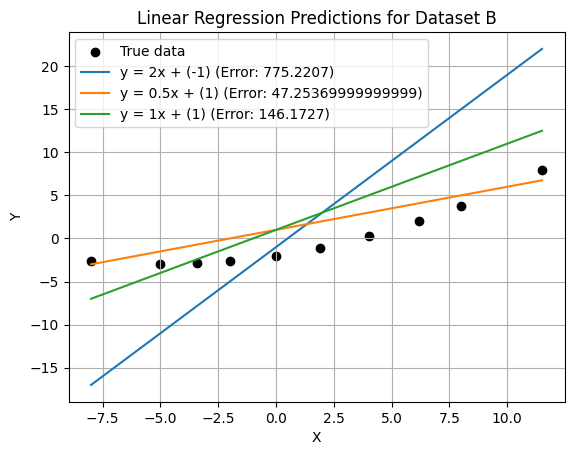

In [29]:
import matplotlib.pyplot as plt


parameters = [(2, -1), (0.5, 1), (1, 1)]


for dataset_name, dataset in datasets.items():
    x = dataset["input"]
    y_true = dataset["output"]

    print(f"Dataset to analize {dataset_name}:")

    plt.Figure(figsize=(10, 5))
    
    # Plot the true data
    plt.scatter(x, y_true, color='black', label='True data')

    # Iterate through the parameters
    for (w, b) in parameters:
        y_pred = []
        model = LinRegressor(w, b)
        y_pred = model.predict(x)
        err = model.error(y_true)
        print(f"Error for dataset {dataset_name} with w={w} and b={b}: {err}")
        
        # Plot the predicted data
        plt.plot(x, y_pred, label=f"y = {w}x + ({b}) (Error: {err})")

    # Set the title and labels
    plt.title(f"Linear Regression Predictions for Dataset {dataset_name}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()
    





- Yes, a cero error represents the system perfectly but it does not mean a general rule for all the exinting datasets, there's not clue that all the datasets could be represent perfetly if theres a cero error value. 

- As it shows, not all the datasets could be represented or guessed by the predicter, only the datasets that represents a linear curve, that's why the dataset B shows higher error values in compare to the error values in the dataset with the three diferents set of parameters w and b, systems like not linear datasets, caotic and discrete will not be represented corretly. 

### 2. Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a Python code that partially implements a neural network with three layers: input, hidden and output. It defines methods for training and inference and uses the XOR function as a test case.

Study the code to get familiar with it and **complete the implementation of the forward()** method that takes in the network inputs to produce the outputs.
Verify the network works by running the code and observing the error going down and producing corrects results. Also play with the training parameters to see how learning improves or degrades.

Then mode to **implementing the my_dot() method to replace NumPy's dot()**, in order to make explicit the operations that are executed every time the method is called. Modify the forward method to use the new function and verify its correctness.

In [ ]:
import numpy as np

class NeuralNetwork:
    """
    A simple feedforward neural network with one hidden layer.
        Attributes:
            input_size (int): Number of input features.
            hidden_size (int): Number of neurons in the hidden layer.
            output_size (int): Number of output neurons.
            weights_input_hidden (numpy.ndarray): Weights from input to hidden layer.
            bias_input_hidden (numpy.ndarray): Bias for hidden layer.
            weights_hidden_output (numpy.ndarray): Weights from hidden to output layer.
            bias_hidden_output (numpy.ndarray): Bias for output layer.
        Methods:
            my_dot(A, B): Custom dot product function to calculate the dot product of two matrices.
            sigmoid(x): Sigmoid activation function.
            sigmoid_derivative(x): Derivative of the sigmoid function.
            forward(x): Forward pass through the network.
            backward(x, y, output, learning_rate): Backpropagation algorithm to update weights and biases.
            train(x, y, epochs, learning_rate): Train the neural network using backpropagation.
    """

    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the neural network with input, hidden, and output sizes.
            Parameters:
                input_size (int): Number of input features.
                hidden_size (int): Number of neurons in the hidden layer.
                output_size (int): Number of output neurons.
            Returns:
                None 
        """

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def my_dot(self, A, B):
        """
        Custom dot product function to calculate the dot product of two matrices.
            Parameters:
                A (numpy.ndarray): First matrix.
                B (numpy.ndarray): Second matrix.
            Returns:
                numpy.ndarray: Result of the dot product.
        """
        
        # 1. A y B are unidimensional arrays
        if isinstance(A[0], (int, float)) and isinstance(B[0], (int, float)):
            if len(A) != len(B):
                raise ValueError("Vectors must have the same length")
            return sum(a * b for a, b in zip(A, B))
    
        # 2. A are unidimensional and B are bidimensional arrays
        if isinstance(A[0], (int, float)) and isinstance(B[0], list):
            if len(A) != len(B):
                raise ValueError("Length of vector A must equal number of rows in B.")
            B_t = list(zip(*B))  # This is apparently easier than doing with the normal vector
            return [sum(a * b for a, b in zip(A, col)) for col in B_t]
        
        # 3. A and B are bidimensional arrays
        if isinstance(A[0], list) and isinstance(B[0], list):
            if len(A[0]) != len(B):
                raise ValueError("Vectors must have the same length")
            
            B_t = list(zip(*B))  # This is apparently easier than doing with the normal vector
            return [[sum(a * b for a, b in zip(row_a, col_b)) for col_b in B_t] for row_a in A]
        
        raise ValueError("Invalid input types for dot product")

    def sigmoid(self, x):
        """
        Sigmoid activation function.
            Parameters:
                x (numpy.ndarray): Input data.
            Returns:
                numpy.ndarray: Output after applying the sigmoid function.
        """

        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        Derivative of the sigmoid function.
            Parameters:
                x (numpy.ndarray): Input data.
            Returns:
                numpy.ndarray: Derivative of the sigmoid function.
        """
        return x * (1 - x)

    def forward(self, x):
        """
        Forward pass through the network.
            Parameters:
                x (numpy.ndarray): Input data.
            Returns:
                numpy.ndarray: Output of the network.
        """
        
        self.input = x

        # Paso 1: entrada -> capa oculta
        self.hidden_input = self.my_dot(self.input.tolist(), self.weights_input_hidden.tolist())
        self.hidden_input = np.array(self.hidden_input) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Paso 2: capa oculta -> salida
        self.output_input = self.my_dot(self.hidden_output.tolist(), self.weights_hidden_output.tolist())
        self.output_input = np.array(self.output_input) + self.bias_hidden_output
        self.output = self.sigmoid(self.output_input)

        return self.output

    def backward(self, x, y, output, learning_rate):
        """
        Backpropagation algorithm to update weights and biases.
            Parameters:
                x (numpy.ndarray): Input data.
                y (numpy.ndarray): Target output data.
                output (numpy.ndarray): Predicted output data.
                learning_rate (float): Learning rate for weight updates.
        
            Returns:
                None
        """

        # Calculate the error and gradients
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        # Backpropagation
        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        """
        Train the neural network using backpropagation.
            Parameters:
                x (numpy.ndarray): Input data.
                y (numpy.ndarray): Target output data.
                epochs (int): Number of training epochs.
                learning_rate (float): Learning rate for weight updates.
            Returns:
                None
        """

        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
# The input size is 2 (for XOR), hidden size is 4, and output size is 1
# So the parameters of the NeuralNetwork class are:
# input_size = 2------------------->    I: Number of inputs
# hidden_size = 4----------------->     H: Number of neurons in the hidden layer
# output_size = 1----------------->     O: Number of outputs

# Create a neural network instance
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Train the neural network
nn.train(X, y, epochs=1000, learning_rate=0.8)

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Epoch 0: Loss = 0.2576
Epoch 100: Loss = 0.2489
Epoch 200: Loss = 0.2370
Epoch 300: Loss = 0.1881
Epoch 400: Loss = 0.0866
Epoch 500: Loss = 0.0237
Epoch 600: Loss = 0.0107
Epoch 700: Loss = 0.0065
Epoch 800: Loss = 0.0045
Epoch 900: Loss = 0.0034

Test the trained model:
Input: [0 0], Predicted Output: [[0.05674264]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.94620282]], Actual Output: [1]
Input: [1 0], Predicted Output: [[0.94717453]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.04613394]], Actual Output: [0]


Let's define an abstraction in which basic computations are: additions, subtractions, multiplications, divisions or computing an activation fuction such as the sigmoid or its derivative. Then, analyze the code in detail to answer the following questions:

*   How many scalar basic computations are requiered for one forward pass, for one training iteration and for a complete training process?
*   Which are the newtwork parameters that determine the amount of computations required?

**Write a formula** that gives the amount of basic scalar computations depending on the network parameters.

## Solution

From the code we can obtain the parameters:
* **I**: Number of inputs.
* **H**: Number of neurons in the hide layer.
* **O**: Number of outputs.
* **N**: Number of training examples. 
* **E**: Number of epochs

To calculate the number of operations in the forward operation in one sample we divide the two main task, first the step 1: from the input to the hide layer and secondly the step 2: from the hide layer to the output.

### First step:

Here we have:
```Python
self.hidden_input = self.my_dot(self.input.tolist(), self.weights_input_hidden.tolist())
self.hidden_input = np.array(self.hidden_input) + self.bias_input_hidden
self.hidden_output = self.sigmoid(self.hidden_input)

```

It does $I*H$ multiplications, $I*H$ additions and H sigmoide operation. 

### Second step:

Now in the second step it has the following code:
```Python
self.output_input = self.my_dot(self.hidden_output.tolist(), self.weights_hidden_output.tolist())
self.output_input = np.array(self.output_input) + self.bias_hidden_output
self.output = self.sigmoid(self.output_input)
```

It has $H*O$ multiplications, $H*O + O$ additions and O sigmoide operation

In sumary the total of operations in a single sample fordware operation is
$$ C_{forward} = 2(IH + HO) + 2H +2O$$

Now we calculate the trainig iteration amount of operatios for a single sample. Again we could divide the operation as Output error and gradient, backpropagate to hidden and update weights and biases. 

### Output error and gradient. 

It contains the follow code
```python
self.error = y - output
d_output = self.error * self.sigmoid_derivative(output)
```

it means: $O$ subtractions, $2*O$ Derivates and $O$ element-wise multiplication. So we got $$*O$ operations. 

### Backpropagate to hidden.
With the following code:

```python
self.hidden_error = d_output.dot(self.weights_hidden_output.T)
d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)
```

Now we have: $H*O$ multiplications and $H*(O-1)$ and $3*H$ for the sigmoid derivate and the multiplications for element wise gradient, obtaining then: $H(2O+2)$

### Update weights and biases.

Finally the code:
```python
self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
```
obtaining $H*O + I*H$ multiplications and $H*O+I*H + O + O$ additions


To get the final expresion to estimate the number of operations:

$$C_{backward} = 2(IH + HO) +4H + 5O $$

And for the total of operations in the train process, with all the samples and epochs we could estimate with:

$$C_{total} = EN[2(IH + HO) +4H + 5O]$$

### 3. Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, it can lead to a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the **MNIST dataset**. Investigate how to obtain the dataset and how to prepare a proper partition between training and test.

The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). **Configure and test at least five versions of the model** by varying the amount of neurons in the hidden layer.

Make a table or a plot to report the following for each model:

*   Number of model parameters
*   Number of basic scalar computations for a forward pass (using the previously created formula)
*   Execution time for training and for a forward pass
*   Model's Top-1 accuracy.

In [1]:
# Preparation of the dataset

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import sequential

ModuleNotFoundError: No module named 'tensorflow'